Starting with Linear Regression - Manual (without library) and with Library

In [ ]:
# practising linear regression:
import numpy as np
import matplotlib.pyplot as plt

# Sample data: hours of work (independent variable) and marks (dependent variable)
work_hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]) # y
marks = np.array([50, 55, 60, 65, 70, 75, 80, 85, 90]) # x

# firstly we got formula y = mx + b
# y is dependent and x is independent
# y -> marks and x -> work_hours
# main goal in linear regression is to find m and then to find b
# formula to find the slope m -> m = n * summation(xi yi) - summation (xi) summation (yi)
#                                     ----------------------------------------------------
#                                      n * summation(xi^2) - (summation xi) ^2

# n is the number of work hours
# we gotta find m and b
# b = summation yi - m summation xi
#     -----------------------------
#                  n

# Plot the data
plt.scatter(work_hours, marks, color='blue')
plt.xlabel('Hours of Work')
plt.ylabel('Marks')
plt.title('Work Hours vs Marks')
plt.show()

In [ ]:
# now lets calculate the values for m and b respectively
# firstly we got formula y = mx + b
# y is dependent and x is independent
# y -> marks and x -> work_hours

# first calculating the value for n
n = len(work_hours)

sum_x = np.sum(work_hours)
sum_y = np.sum(marks)

sum_xy = np.sum(work_hours * marks)
sum_x_square = np.sum(work_hours ** 2)

# now we can find m -> slope
numerator = (n * sum_xy) - (sum_x * sum_y) 
denominator = (n * sum_x_square) - (sum_x ** 2)
m = numerator/denominator
#print(m)

# we know m now we can find b
b = (sum_y - (m*sum_x))/n
#print(b)

# formula -> y = mx + b
# now we can assume random values for x -> which btw is independent, we said in the beginning that we can
# use indepdentent variable to predict the dependent variable
# using x to predict y
# using work_hours to predict exam score/marks

# Function to predict marks based on hours of work
def predict_marks(hours):
    return m * hours + b

# Example prediction
hours = 10
predicted_marks = predict_marks(hours)
print(f"Predicted marks for {hours} hours of work: {predicted_marks}")

With library:

In [3]:
import numpy as np
import matplotlib.pyplot as py
from sklearn.linear_model import LinearRegression

# firstly setting up example data
work_hours = [[2],[4],[6],[8],[10]]
marks = [20,40,60,80,100]

# making an instance of linear regression model
linear_reg = LinearRegression()

# Now, finding the best fit line first:
linear_reg.fit(work_hours,marks)

# now finding the slope and intercept:
slope = linear_reg.coef_[0]
intercept = linear_reg.intercept_

# printing it:
print("Slope:",slope)
print("Intercept:",intercept)

Slope: 10.000000000000002
Intercept: -1.4210854715202004e-14


Text(0.5, 1.0, 'Scatter-Plot')

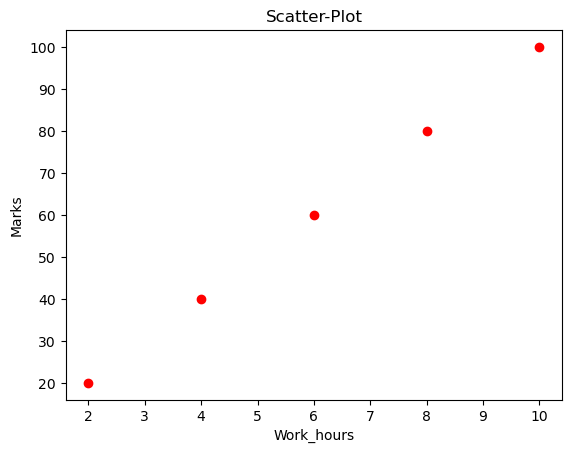

In [4]:
# Using Matplot to have a clear visual:

#1. Drawing the scatterplot
py.scatter(work_hours,marks,color='red')
py.xlabel("Work_hours")
py.ylabel("Marks")
py.title("Scatter-Plot")

[10. 30. 50. 70. 90.]


Text(0.5, 1.0, 'Prediction')

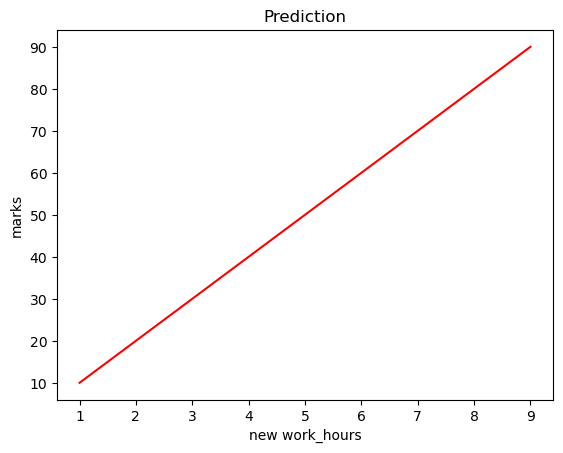

In [10]:
# Now making a prediction using a new data set
new_data = [[1],[3],[5],[7],[9]] # new work hours

predicted_marks = linear_reg.predict(new_data)
print(predicted_marks)

# Calculate and print the residuals and their squared values
#residuals = np.array(marks) - predicted_marks
#squared_residuals = residuals ** 2

#print("Residuals:", residuals)
#print("Squared Residuals:", squared_residuals)

# Calculate the residual sum of squares (RSS)
#rss = np.sum(squared_residuals)
#print("Residual Sum of Squares (RSS):", rss)

# lets visualize
py.plot(new_data,predicted_marks,color='red')
py.xlabel("new work_hours")
py.ylabel("marks")
py.title("Prediction")

Another Problem on Linear Regression (Using Library)

In [1]:
# Another problem on Linear Regression:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as py

# load the data
california = fetch_california_housing()
x = california.data
y = california.target

# Divide the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=43)

# Now, load instance
model = LinearRegression()

# now fit
model.fit(x_train,y_train)

# now find slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# now make prediction
y_pred = model.predict(x_test)
print(y_pred)

# evaluating the model
mse = mean_squared_error(y_test,y_pred)
root_square = r2_score(y_test,y_pred)

print("Mean squared error:",mse) # should be as low as possible
print("Root squared:",root_square) # should be close to 1, higher is better

[1.774009   1.9291368  1.52901858 ... 4.40117828 2.05595748 1.28172226]
Mean squared error: 0.5142688346592971
Root squared: 0.6152556952851704


Another dataset

In [7]:
# Another dataset
from sklearn.datasets import load_diabetes

# Make an instance
diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target

# Now, divide the data into training and testing split:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=45)

# Making an instance of linear regression
model = LinearRegression()

# Use fit to understand the data -> train the model
model.fit(x_train,y_train)

# figure out the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Now, understand that x_test is the input or the features and y_test is the outcome, output
# we use x_test in prediction, and then compare it with the output aka y_test

prediction = model.predict(x_test)
#print(prediction)

# Evaluating the model using MSE and R^2
mse = mean_squared_error(y_test,prediction) # see we used y_test to compare with prediction, lower the better
r_square = r2_score(y_test,prediction) # higher the better

print("MSE:",mse)
print("Root Square:",r_square)

# lets check the variance of the target variable y
variance = np.var(y)
print("Variance:",variance)
# Now, if u compare that with our MSE, then it isn't the worst model

MSE: 2492.6346427346507
Root Square: 0.5326715876099555
Variance: 5929.884896910383


Ridge Regression & Issues with Linear Regression:

In [15]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score

# Making an instance of the data
diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target

# train/test etc
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=45)

# Now making an instance of ridge regression and setting value for alpha
# dont set it too high or too low
ridge_reg = Ridge(alpha=0.5)

# now fit . . .
ridge_reg.fit(x_train,y_train)

# now predict
prediction = ridge_reg.predict(x_test)
#print(prediction)

# now evaluate
mse = mean_squared_error(y_test,prediction)
r_square = r2_score(y_test,prediction)

# find variance
variance = np.var(y)

print("Ridge Regression")
print("MSE:",mse)
print("root square:",r_square)
print("Variance:",variance)

# printing coefficents
print(ridge_reg.coef_)

if mse < variance:
    print("Model is good")
else:
    print("model needs more work")
    

    

Ridge Regression
MSE: 2829.8777618323315
root square: 0.4694439935071628
Variance: 5929.884896910383
[  50.06639996  -62.6680967   322.02804507  238.72414875   -7.87706993
  -47.22193934 -155.62220587  126.34048655  297.06816685  114.28203414]
Model is good


Lasso Regression

Lasso is useful for feature extraction, it also does the same thing as ridge but the way it gives
penalty is different, it uses L1 penalty and ridge uses L2 penalty, now whats important is as follows:
lasso might shrink some features to 0, basically it keeps features (selected) and might shrink some to 0, while ridge does shrink features but it doesnt shrink them to 0.

Also, there is one more thing, lasso -> alpha summation( |coefficent| )
-> absolute value

while ridge -> alpha summation(coefficent^2)

also we can set the value of alpha, stronger the alpha stronger will be the penalty

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Make an instance of the dataset
breast_cancer = load_breast_cancer()
x = breast_cancer.data
y = breast_cancer.target

# Now, split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=45)

# Making an instance of lasso
model = Lasso()

# fit -> understanding the data and training the model
model.fit(x_train,y_train)

# Now, we know the coefficent and intercept
coefficent = model.coef_
intercept = model.intercept_

print("Coefficent:",coefficent)
print("intercept:",intercept)

# Now, make predictions
prediction = model.predict(x_test)

# Now evaluate the model
mse = mean_squared_error(y_test,prediction)
r_square = r2_score(y_test,prediction)

print("Lasso Regression")
print("MSE:",mse)
print("Root Square:",r_square)

# finding variance
variance = np.var(y)
print("Variance is:",variance)

if mse < variance:
    print("Model is decent")
else:
    print("Model needs more work")

Coefficent: [-0.         -0.         -0.         -0.0001284  -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.00021747 -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.00250081 -0.00039276
 -0.         -0.         -0.         -0.         -0.         -0.        ]
intercept: 1.3229795949171061
Lasso Regression
MSE: 0.09961211774331276
Root Square: 0.5659079083558557
Variance is: 0.23376503037734625
Model is decent


Classification Models: 
1. Decision Trees


['Pass' 'Fail' 'Pass' 'Pass']


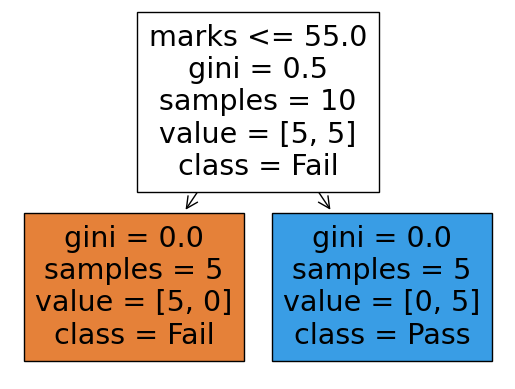

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# sample data:
marks = [[10],[20],[30],[40],[50],[60],[70],[80],[90],[100]]
result = ['Fail','Fail','Fail','Fail','Fail','Pass','Pass','Pass','Pass','Pass']

# make an instance
clf = DecisionTreeClassifier()

# fit->training the model
clf.fit(marks,result)

# new data
new_marks = [[65],[15],[75],[95]]

# now lets predict
prediction = clf.predict(new_marks)
print(prediction)

# visualize the result
tree.plot_tree(clf,feature_names=['marks'],class_names=['Fail','Pass'],filled=True)
plt.show()

Pruning:

Accuracy is: 1.0
Scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Average: 0.9533333333333334


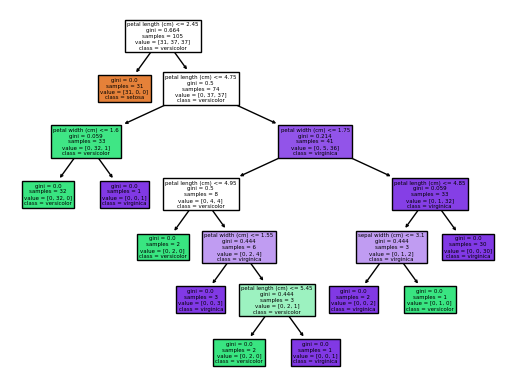

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,train_test_split

# starting by loading the dataset
iris = load_iris()
x = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names.tolist()

# divide the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

# now making an instance
clf = DecisionTreeClassifier(random_state=42)

# fit -> training model
clf.fit(x_train,y_train)

# now predict
prediction = clf.predict(x_test)

# evaluate
accuracy = accuracy_score(y_test,prediction)
print("Accuracy is:",accuracy)

# cross val check:
scores = cross_val_score(clf,x,y,cv=5)
print("Scores:",scores)
average = print("Average:",scores.mean())

# lets prune the tree:
pruned_tree = DecisionTreeClassifier(max_depth=3,random_state=42)
pruned_tree.fit(x_train,y_train)
pruned_tree.predict(x_test)

# plot:
tree.plot_tree(clf,feature_names=feature_names,class_names=class_names,filled=True)
plt.show()

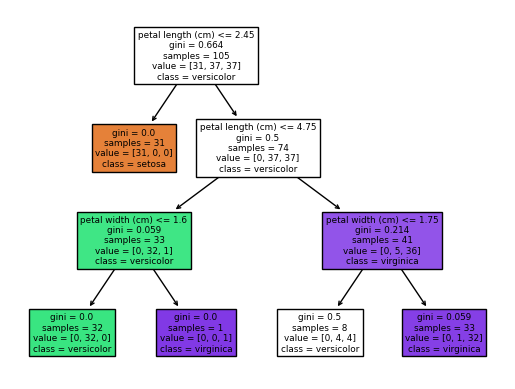

In [44]:
# plotting pruned tree:
tree.plot_tree(pruned_tree,feature_names=feature_names,class_names=class_names,filled=True)
plt.show()

2. Random Forest: It is essentially a combination of decision trees

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset, initially it is continuous but i convert it to discrete since -> classification:
data = {
    'Rooms': [2, 3, 4, 3, 5, 2, 4, 3],
    'SquareFootage': [1000, 1500, 2000, 1600, 2500, 1200, 1900, 1700],
    'Age': [20, 15, 10, 15, 5, 25, 10, 20],
    'Price': [200000, 250000, 300000, 260000, 400000, 210000, 320000, 280000]
}

# Converting the continuous target which was price to discrete
sample1 = pd.DataFrame(data)
sample1['Expensive'] = sample1['Price'].apply(lambda x: 1 if x > 350000 else 0)
#print(sample1)

# setting up x and y values respectively . . .
x = sample1[['Rooms','SquareFootage','Age']] # we will use these to predict the price hence they are features
y = sample1['Expensive'] # this will be used as binary target

# splitting into test and train data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) # training -> 80% will be used

# now setting up the instance for RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# now lets fit -> train the model using training dataset
model.fit(x_train,y_train)

# Now, we can make prediction
prediction = model.predict(x_test)

# Now, lets check its accuracy and make a report for it:
accuracy = accuracy_score(prediction,y_test)
# print(accuracy) # indicates 100% perfection

unique_classes = np.unique(y_test) # y_test is the outcomes
target_names = ['Not Expensive','Expensive'][:len(unique_classes)]
report = classification_report(prediction,y_test,target_names=target_names)
print(report)

               precision    recall  f1-score   support

Not Expensive       1.00      1.00      1.00         2

     accuracy                           1.00         2
    macro avg       1.00      1.00      1.00         2
 weighted avg       1.00      1.00      1.00         2



Testing with Real World Dataset:

In [45]:
# Now, practising with real world dataset:

# 1: Importing libraries:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier

# 2: setting up the pandas dataframe

# first make an instance of the data
data = load_breast_cancer()

# Now, making the dataframe
df = pd.DataFrame(data.data,columns=data.feature_names)
# print(df)

# set up the target
df["Target"] = data.target

# now setting up x and y where x -> features and y -> target
x = df.drop(columns='Target') # after we drop Target we technically have features
y = df['Target'] # since 'Target' is our target

# now we can split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# now forming an instance of the model
model = RandomForestClassifier(n_estimators=100,random_state=42)

# fit -> train model
model.fit(x_train,y_train)

# now make prediction
prediction = model.predict(x_test)

# now print it
# print(prediction)

# now evaluate by checking the accuracy
accuracy = accuracy_score(prediction,y_test)
print(accuracy) # close to 1 hence it is good enough

# now we need to form a report
unique_classes = np.unique(y_test)
target_names = data.target_names[:len(unique_classes)]
report = classification_report(prediction,y_test,target_names=target_names)
print()
print("Report is:")
print(report)

# 93% of the samples predicted to be malignant were actually malignant
# 98% of the actual malignant samples were correctly identified by the model

0.9649122807017544

Report is:
              precision    recall  f1-score   support

   malignant       0.93      0.98      0.95        41
      benign       0.99      0.96      0.97        73

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [ ]:
# Practising KNN - useful for smaller data not useful for large data
# e.g u got a bunch of fruits now you will not compute nor train ur model, u will simply look at ur
# neighbour fruits and check their e.g weight and color then u will make a reasonable guess on what fruit u
# currently have, this fails when it comes to large data set

3. KNN - k nearest neighbour
useful for small dataset, e.g you have fruit sets, now you wanna predict a new fruit by looking
at the nearest neighbours, that will tell you in which category the fruit belongs to
that is it for knn

    X (Data Points):

    Each row represents a data point in the 2D space.
    Example: The first data point is at coordinates (-2.97867201, 9.55684617).
    y (Labels):

    Each value corresponds to the cluster label of the data point in X.
    Example: The first data point belongs to cluster 0.

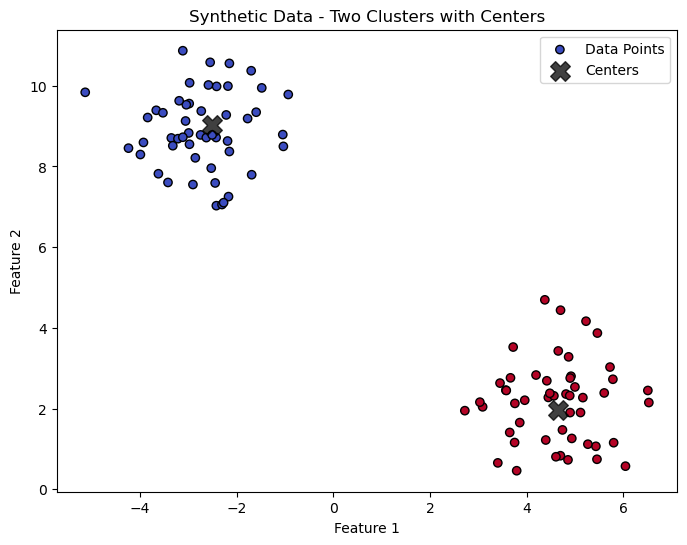

Accuracy of KNN classifier: 1.00


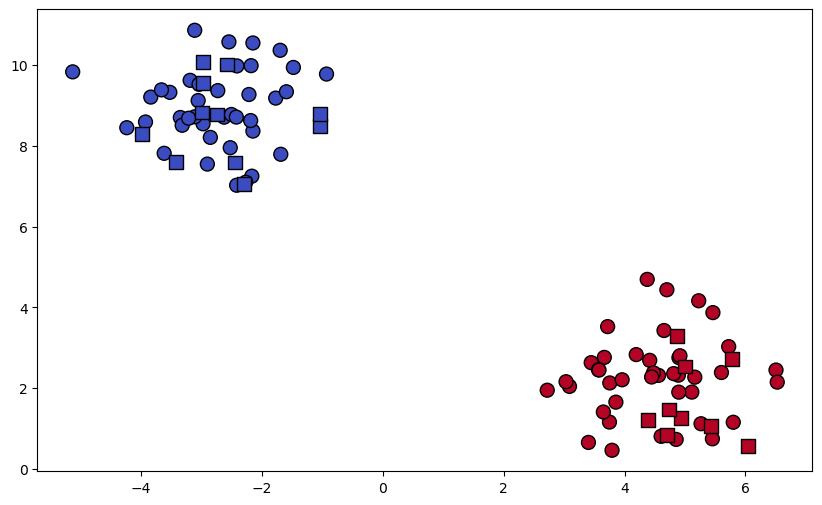

In [12]:
# Step 1: Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np 

# Step 2: Generate synthetic data
X, y, centers = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0, return_centers=True)

# Step 3: Plot the synthetic data and the centers
plt.figure(figsize=(8, 6))
# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', label='Data Points')
# Plot the centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, marker='X', label='Centers')
plt.title('Synthetic Data - Two Clusters with Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Initialize KNN with K=3

knn.fit(X_train,y_train)

# Step 7: Predict on new data (in this case, test data)
predictions = knn.predict(X_test)

# Step 8: Evaluate the model
accuracy = knn.score(X_test, y_test)
print(f"Accuracy of KNN classifier: {accuracy:.2f}")

# Visualize the decision boundary (optional)
plt.figure(figsize=(10, 6))
# Plot training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=100, label='Training Data')
# Plot test points
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='coolwarm', marker='s', edgecolor='k', s=100, label='Test Data Predictions')

Real World Dataset:

KNN
Evaluating the score:
80.0 %

Cross Val Score:
[0.73333333 0.73333333 0.76666667 0.83333333 0.73333333]
Mean cross-validation score: 0.76

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.62      0.67      0.64        12
           2       0.69      0.64      0.67        14

    accuracy                           0.80        45
   macro avg       0.77      0.77      0.77        45
weighted avg       0.80      0.80      0.80        45



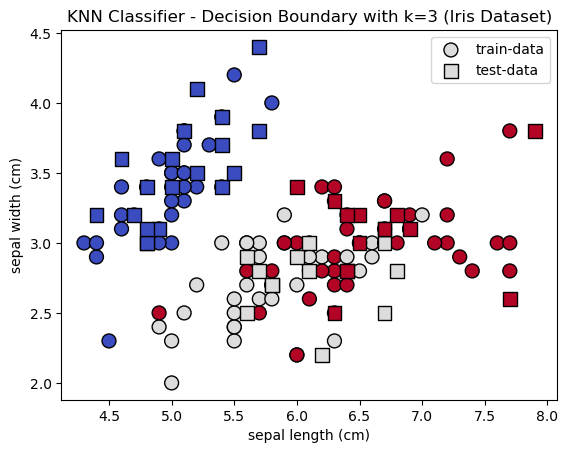

In [65]:
# 1. importing libraries:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 2. Load the dataset/make an instance
iris = load_iris()
x = iris.data[:,:2] # say I only want every row from the first two columns
y = iris.target # y will contain the target

# e.g [1,2
#      3,4]

# that will be x (data-points, but in 1D)
# y will be the labels - 0 or 1 indiciating which cluster to go to

# 3. Split the data into test and train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# 4. Making an instance for the KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,algorithm='auto')

# 5. Using fit, but here fit doesn't train the model, KNN is lazy it doesn't train the model
# what it does is, "stores the data point using fit, then it calculates the distance and depending
# on where the distance is closest (i.e wrt cluster) it goes there."

model.fit(x_train,y_train)

# 6. Now, we can make prediction using new data points
predictions = model.predict(x_test)

# 7. Now, we can evaluate the score
print("KNN")
print("Evaluating the score:")
accuracy = accuracy_score(predictions,y_test)
print(accuracy*100,"%")
print("")
cross_val_scores = cross_val_score(model,x,y,cv=5)
print("Cross Val Score:")
print(cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())
print("")
print("Classification report:")
print(classification_report(predictions,y_test))


# 8. Final step is visualization:

# first for train data:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap="coolwarm",edgecolor="k",s=100,label="train-data")

# now for test data
plt.scatter(x_test[:,0],x_test[:,1],c=predictions,cmap="coolwarm",edgecolor="k",marker="s",s=100,label="test-data")

# just neating up the final graph:
plt.title("KNN Classifier - Decision Boundary with k=3 (Iris Dataset)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

4. Naive Bayes - probability of something being somewhere

In [90]:
# 1. importing libraries
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 2. Making an instance of the iris data
iris = load_iris()
x = iris.data
y = iris.target

# 3. Splitting the data into train and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# 4. making an instance of the model
model = GaussianNB()

# 5. Fit -> training the model
model.fit(x_train,y_train)

# 6. predicting
prediction = model.predict(x_test)
print("Naive Bayes")
print("")
print("Predicted:",prediction)
print("")
print("Actual:",y_test)
print("")
print("Accuracy is: ",accuracy_score(prediction,y_test))
cross_val_scores = cross_val_score(model,x,y,cv=5)
print("Cross Value: ",cross_val_scores)
print("Mean: ",cross_val_scores.mean())
print("Report:")
print(classification_report(prediction,y_test))

Naive Bayes

Predicted: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]

Actual: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]

Accuracy is:  0.9777777777777777
Cross Value:  [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Mean:  0.9533333333333334
Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [89]:
# 1. importing libraries
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split,cross_val_score

# 2. Making an instance of the iris data
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

# 3. Splitting the data into train and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# 4. making an instance of the model
model = GaussianNB()

# 5. Fit -> training the model
model.fit(x_train,y_train)

# 6. predicting
prediction = model.predict(x_test)
print("Naive Bayes")
print("")
print("Predicted:",prediction)
print("")
print("Actual:",y_test)
print("")
print("Accuracy is: ",accuracy_score(prediction,y_test))
cross_val_scores = cross_val_score(model,x,y,cv=5)
print("Cross Value: ",cross_val_scores)
print("Mean: ",cross_val_scores.mean())
print("Report:")
print(classification_report(prediction,y_test))

Naive Bayes

Predicted: [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0]

Actual: [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]

Accuracy is:  0.9415204678362573
Cross Value:  [0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]
Mean:  0.9385188635305075
Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        61
           1       0.96

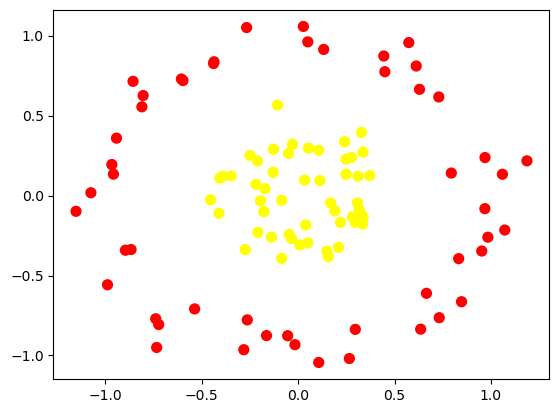

In [17]:
from sklearn.svm import SVC
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Create a dataset of points forming a circle
X, y = make_circles(n_samples=100, factor=0.3, noise=0.1)

# Train SVM with RBF kernel
clf = SVC(kernel='rbf')
clf.fit(X, y)

# Plotting the data points and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()


5. SVC CLASSIFICATION
-> hyperplane divides the labels (e.g blue and red) using a margin line
-> many lines but the best one is the one with the max distance wrt the line and the support vector (end point)
-> in 2D it is just a line but beyond that we use kernels
-> e.g linear, sigmoid, rbf, and polynomial
-> when to use which?
-> gridsearchCV use that to figure the best one

In [17]:
# Using gridsearch to figure which kernel we should use
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# 1. load the data
iris = load_iris()
x = iris.data
y = iris.target

#print(x)
#print("")
#print(y)

# train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# make a grid that we will pass to gridsearchcv
grid = [
    {'kernel':['linear'],'C':[0,1,1,10,100]},
    {'kernel':['rbf'],'C':[0,1,1,10,100], 'gamma':[0.001,0.01,0.1,1]},
    {'kernel':['poly'],'C':[0,1,1,10,100], 'degree':[2,3,4],'gamma':[0.001,0.01,0.1,1]},
    {'kernel':['sigmoid'],'C':[0,1,1,10,100], 'gamma':[0.001,0.01,0.1,1]},

]

# Fit the model
grid_search.fit(X_train, y_train)
print(grid_search)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy * 100:.2f}%")

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0, 1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0, 1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
                         {'C': [0, 1, 1, 10, 100], 'degree': [2, 3, 4],
                          'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['poly']},
                         {'C': [0, 1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1],
                          'kernel': ['sigmoid']}],
             scoring='accuracy')
Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.97
Test set accuracy: 100.00%


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
105 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\util

Accuracy is : 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


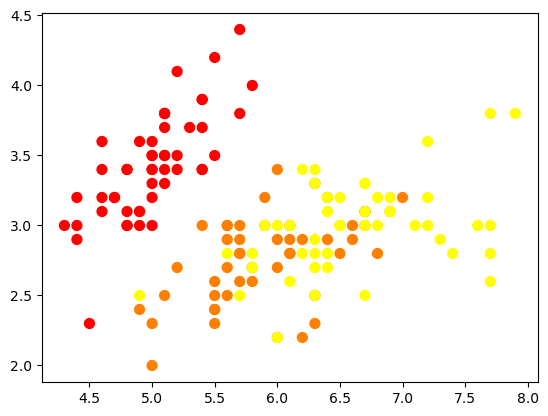

In [34]:
 #Using gridsearch to figure which kernel we should use
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt

# 1. load the data
iris = load_iris()
x = iris.data
y = iris.target

#print(x)
#print("")
#print(y)

# train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# loading an instance of it
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# evaluating:
final_accuracy = accuracy_score(y_pred,y_test)
print("Accuracy is :", final_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting the data points and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

In [50]:
# Importing libraries:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# loading the data
wine = load_wine()
x = wine.data
y = wine.target

# Split into testing and training:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# Now, lets figure out which kernel we gotta use
# options are: linear, poly, sigmoid, rgb

grid = [
    {'kernel':['linear'],'C':[0.1,1,10,100]},
    {'kernel':['poly'],'C':[0.1,1,10,100],'degree':[2,3,4],'gamma':[0.001,0.01,0.1,1]},
    {'kernel':['sigmoid'],'C':[0.1,1,10,100],'gamma':[0.001,0.01,0.1,1]},
    {'kernel':['rbf'],'C':[0.1,1,10,100],'gamma':[0.001,0.01,0.1,1]}
];

# using gridsearchcv
grid_search = GridSearchCV(SVC(),grid,cv=5,scoring='accuracy')

# using fit to train the model
grid_search.fit(x_train,y_train)

# Checking the result
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

# Evaluating the best model on the test set
best_model = grid_search.best_estimator_
print("Best Kernel: ",best_model)
y_pred = best_model.predict(x_test)

# Print test set accuracy
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {final_accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)




Best parameters: {'C': 0.1, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
Best cross-validation accuracy: 0.94
Best Kernel:  SVC(C=0.1, degree=2, gamma=0.001, kernel='poly')
Test set accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Confusion Matrix:
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


In [52]:
# Display confusion matrix as a DataFrame for better readability
conf_matrix_df = pd.DataFrame(conf_matrix, index=wine.target_names, columns=wine.target_names)
print("\nConfusion Matrix (as DataFrame):")
conf_matrix_df


Confusion Matrix (as DataFrame):


,class_0,class_1,class_2
class_0,19,0,0
class_1,0,21,0
class_2,0,0,14


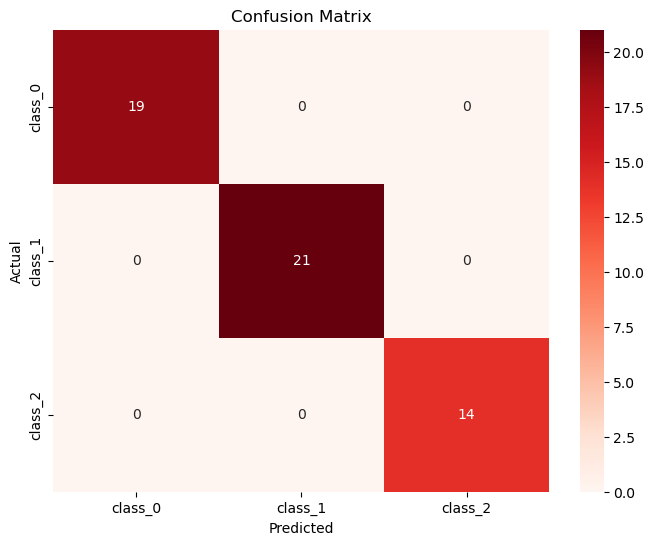

In [61]:
import seaborn as sns
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Reds', fmt='g')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [83]:
import logging
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import seaborn as sns

# Making a function to load the data
def load_data():
    wine = load_wine()
    x = wine.data
    y = wine.target
    return train_test_split(x,y,test_size=0.3,random_state=42)

# Making a function to make a grid
def create_grid():
    return [
    {'kernel':['linear'],'C':[0.1,1,10,100]},
    {'kernel':['poly'],'C':[0.1,1,10,100],'degree':[2,3,4],'gamma':[0.001,0.01,0.1,1]},
    {'kernel':['sigmoid'],'C':[0.1,1,10,100],'gamma':[0.001,0.01,0.1,1]},
    {'kernel':['rbf'],'C':[0.1,1,10,100],'gamma':[0.001,0.01,0.1,1]}
]

# Making a function to evaluate the best parameter and score from grid
def grid_evaluate(x_train,y_train,grid):
    grid_check = GridSearchCV(SVC(),grid,cv=5,scoring='accuracy')
    grid_check.fit(x_train,y_train)
    return grid_check
    
# Making a function to make prediction and evlauating the model:
def model_evaluate(model,x_test,y_test):
    prediction = model.predict(x_test)
    # figuring out the accuracy
    accuracy_final = accuracy_score(y_test,prediction)
    print("Accuracy: ",accuracy_final)
    print("Classification Report:\n",classification_report(y_test,prediction))
    
    # Finally a confusion matrix
    conf_matrix = confusion_matrix(y_test,prediction)
    print("Confusion Matrix:\n",conf_matrix)
    
    # Making a dataframe of the conf matrix
    data_conf = pd.DataFrame(conf_matrix,index=load_wine().target_names,columns=load_wine().target_names)
    print(data_conf)
    
    return conf_matrix

def main():
    try:
        print("Loading the data:")
        x_train,x_test,y_train,y_test = load_data()
        
        print("Creating the grid:")
        grid_create = create_grid()
        
        print("Evaluating grid:")
        grid_eval = grid_evaluate(x_train,y_train,grid_create)
        
        print("Best parameter:",grid_eval.best_params_)
        print("Best score: ",grid_eval.best_score_)
        
        print("Evaluating the model:")
        conf_matrix = model_evaluate(grid_eval.best_estimator_,x_test,y_test)
        
    except Exception as e:
        print("An error occured.")
        
if __name__  == "__main__":
    main()

Loading the data:
Creating the grid:
Evaluating grid:
Best parameter: {'C': 0.1, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
Best score:  0.9356666666666665
Evaluating the model:
Accuracy:  1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Confusion Matrix:
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
         class_0  class_1  class_2
class_0       19        0        0
class_1        0       21        0
class_2        0        0       14
